<a href="https://colab.research.google.com/github/Aabha-J/Pytorch/blob/main/Binary_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Binary Classification Model

- The model was trained to determine if the coordinate belonged to the red or blue *circle*

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import torch
from torch import nn
from torch import optim
from sklearn.model_selection import train_test_split
import numpy


##Data
Creating the data set with sklearn and spliting it into training and testing data

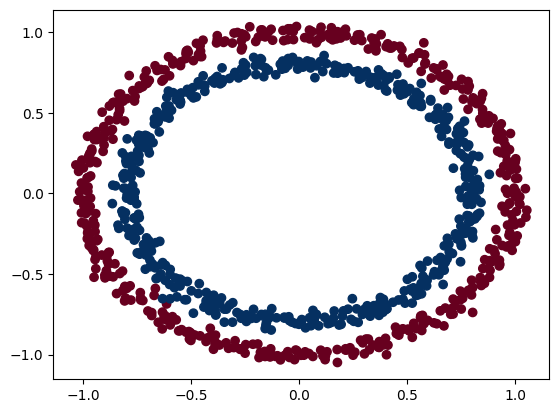

In [43]:
device = 'cuda' if torch.cuda.is_available() else "cpu"

n_samples = 1000

X, y = make_circles(n_samples,noise=0.03)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);


##The Model

Using object oriented programing and inheritence to create the model.

In [44]:
class circle_model_final(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

    self.relu = nn.ReLU()

  def forward(self, x):

    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model =  circle_model_final().to(device)


Loss and Optimizer Functions

In [45]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(params = model.parameters(), lr = 0.01)

##Training  & Testing the Model

In [46]:
epochs = 10000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model.train()

  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)

  if epoch % 1000 == 0:
    print(f"Epoch: {epoch } Loss {loss:.3f} | Test Loss {test_loss:.3f}")

Epoch: 0 Loss 0.694 | Test Loss 0.694
Epoch: 1000 Loss 0.690 | Test Loss 0.691
Epoch: 2000 Loss 0.688 | Test Loss 0.689
Epoch: 3000 Loss 0.685 | Test Loss 0.686
Epoch: 4000 Loss 0.680 | Test Loss 0.682
Epoch: 5000 Loss 0.673 | Test Loss 0.675
Epoch: 6000 Loss 0.661 | Test Loss 0.663
Epoch: 7000 Loss 0.641 | Test Loss 0.644
Epoch: 8000 Loss 0.603 | Test Loss 0.607
Epoch: 9000 Loss 0.538 | Test Loss 0.544


In [47]:
model.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model(X_test))).squeeze()

###Plot Training and Testing

- Use the requests library and pathlib to acquire and make use of functions to plot the training and testing of the model

In [48]:
import requests

from pathlib import Path

#Dowalonad function to visualize what is happening if it doesn't already exist

if Path('helper_functions.py').is_file():
  print("helper functions already there")

else:
  print('Downloading helper functions')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper functions already there


In [49]:
from helper_functions import plot_predictions, plot_decision_boundary

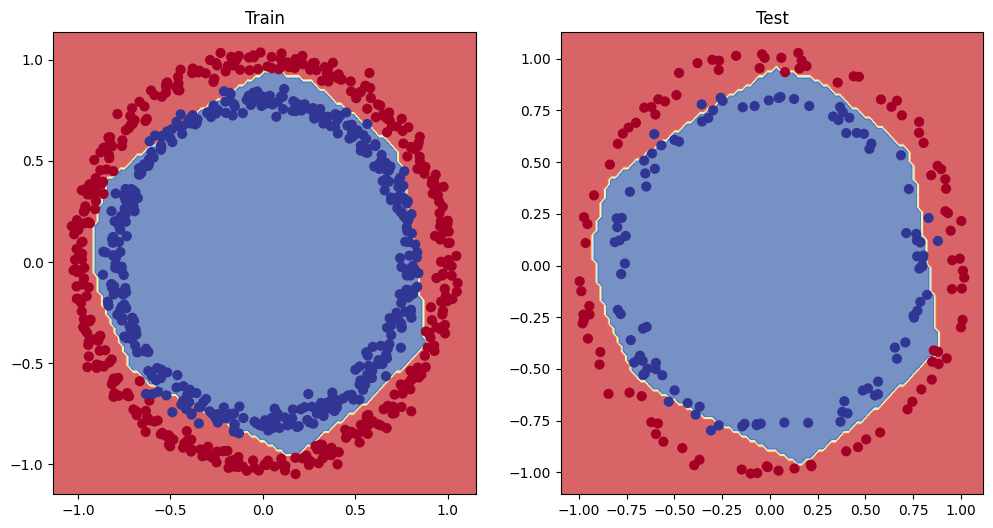

In [50]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)